<a href="https://colab.research.google.com/github/aryasovaalexandra/praktika/blob/main/%D0%B4%D0%B6%D0%BE%D1%80%D0%B4%D0%B61%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns

In [33]:
df = pd.read_csv('/content/crimes_against_women_2001-2014.csv')
df.head()

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [34]:
df = df.drop(columns = ['Unnamed: 0','STATE/UT','Year','Importation of Girls'])
#Тут мы удалили все столбцы, которые нам не давали никакой нужной инфы
df

,DISTRICT,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives
0,ADILABAD,50,30,16,149,34,175
1,ANANTAPUR,23,30,7,118,24,154
2,CHITTOOR,27,34,14,112,83,186
3,CUDDAPAH,20,20,17,126,38,57
4,EAST GODAVARI,23,26,12,109,58,247
...,...,...,...,...,...,...,...
10672,Lakshadweep,1,0,0,1,2,0
10673,Total District(s),1,0,0,1,2,0
10674,Karaikal,3,1,0,12,1,1
10675,Puducherry,7,6,1,20,7,3


In [35]:
df.describe()

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives
count,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000
mean,57.989885,69.888358,20.181699,113.539196,27.419313,209.224314
std,214.230398,311.623450,98.276531,458.903951,167.806797,905.664362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,6.000000,1.000000,10.000000,0.000000,11.000000
50%,22.000000,20.000000,5.000000,34.000000,2.000000,50.000000
75%,44.000000,49.000000,16.000000,85.000000,12.000000,144.000000
max,5076.000000,10626.000000,2469.000000,10001.000000,4970.000000,23278.000000


In [36]:
df['Rape'] = df['Rape'].apply(lambda x: 'мало насилия' if x<=10.0 else 'средне насилия' if x>10.0 and x<35.0 else 'много насилия' if x>=35.0 else x)

In [37]:
df

,DISTRICT,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives
0,ADILABAD,много насилия,30,16,149,34,175
1,ANANTAPUR,средне насилия,30,7,118,24,154
2,CHITTOOR,средне насилия,34,14,112,83,186
3,CUDDAPAH,средне насилия,20,17,126,38,57
4,EAST GODAVARI,средне насилия,26,12,109,58,247
...,...,...,...,...,...,...,...
10672,Lakshadweep,мало насилия,0,0,1,2,0
10673,Total District(s),мало насилия,0,0,1,2,0
10674,Karaikal,мало насилия,1,0,12,1,1
10675,Puducherry,мало насилия,6,1,20,7,3


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10677 entries, 0 to 10676
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   DISTRICT                                             10677 non-null  object
 1   Rape                                                 10677 non-null  object
 2   Kidnapping and Abduction                             10677 non-null  int64 
 3   Dowry Deaths                                         10677 non-null  int64 
 4   Assault on women with intent to outrage her modesty  10677 non-null  int64 
 5   Insult to modesty of Women                           10677 non-null  int64 
 6   Cruelty by Husband or his Relatives                  10677 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 584.0+ KB


In [39]:
df = df.dropna()
df
#Удалям наны

,DISTRICT,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives
0,ADILABAD,много насилия,30,16,149,34,175
1,ANANTAPUR,средне насилия,30,7,118,24,154
2,CHITTOOR,средне насилия,34,14,112,83,186
3,CUDDAPAH,средне насилия,20,17,126,38,57
4,EAST GODAVARI,средне насилия,26,12,109,58,247
...,...,...,...,...,...,...,...
10672,Lakshadweep,мало насилия,0,0,1,2,0
10673,Total District(s),мало насилия,0,0,1,2,0
10674,Karaikal,мало насилия,1,0,12,1,1
10675,Puducherry,мало насилия,6,1,20,7,3


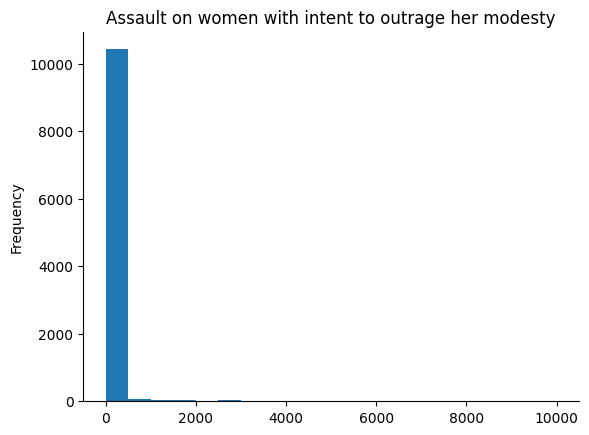

In [40]:
# @title Assault on women with intent to outrage her modesty

from matplotlib import pyplot as plt
df['Assault on women with intent to outrage her modesty'].plot(kind='hist', bins=20, title='Assault on women with intent to outrage her modesty')
plt.gca().spines[['top', 'right',]].set_visible(False)

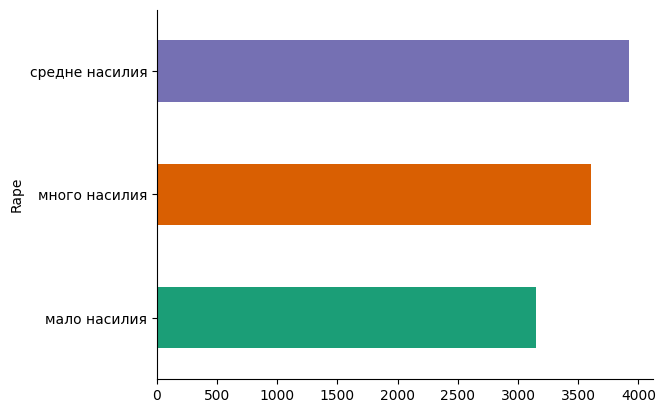

In [41]:
# @title ARape

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Rape').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10677 entries, 0 to 10676
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   DISTRICT                                             10677 non-null  object
 1   Rape                                                 10677 non-null  object
 2   Kidnapping and Abduction                             10677 non-null  int64 
 3   Dowry Deaths                                         10677 non-null  int64 
 4   Assault on women with intent to outrage her modesty  10677 non-null  int64 
 5   Insult to modesty of Women                           10677 non-null  int64 
 6   Cruelty by Husband or his Relatives                  10677 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 584.0+ KB


In [43]:
X=df.drop(columns=['Rape'])
Y = df['Rape']
X

,DISTRICT,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives
0,ADILABAD,30,16,149,34,175
1,ANANTAPUR,30,7,118,24,154
2,CHITTOOR,34,14,112,83,186
3,CUDDAPAH,20,17,126,38,57
4,EAST GODAVARI,26,12,109,58,247
...,...,...,...,...,...,...
10672,Lakshadweep,0,0,1,2,0
10673,Total District(s),0,0,1,2,0
10674,Karaikal,1,0,12,1,1
10675,Puducherry,6,1,20,7,3


**2.**


In [44]:
#Делаем стандартизацию и лэйбл(он для статсмоделей)
scaler = MinMaxScaler()
le = LabelEncoder()
X[['Dowry Deaths']] = scaler.fit_transform(X[['Dowry Deaths']])
X['DISTRICT'] = le.fit_transform(X['DISTRICT'])
X['Kidnapping and Abduction'] = le.fit_transform(X['Kidnapping and Abduction'])
Y=le.fit_transform(Y)

In [45]:
#Выводим коэф параметров регрессии

X = sm.add_constant(X)
mod = sm.OLS(Y.astype(float),X.astype(float))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     24.61
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           3.89e-29
Time:                        04:17:53   Log-Likelihood:                -12836.
No. Observations:               10677   AIC:                         2.569e+04
Df Residuals:                   10670   BIC:                         2.574e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   1.1078      0.016     69.156      0.000       1.076       1.139
DISTRICT                                               -0.0001   1.67e-05     -6.371      0.000      -0.000   -7.35e-05
Kidnapping and Abduction                                0.0015      0.000     10.220      0.000       0.001       0.002
Dowry Deaths                                           -0.1712      0.270     -0.634      0.526      -0.701       0.359
Assault on women with intent to outrage her modesty -4.631e-05   2.83e-05     -1.637      0.102      -0.000    9.14e-06
Insult to modesty of Women                           8.015e-06   6.02e-05      0.133      0.894      -0.000       0.000
Cruelty by Husband or his Relatives                 -4.242e-05   1.43e-05     -2.966      0.003   -7.05e-05   -1.44e-05
==============================================================================
Omnibus:                    65411.914   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1002.508
Skew:                          -0.046   Prob(JB):                    2.03e-218
Kurtosis:                       1.502   Cond. No.                     3.84e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Все значимы так как p-value везде меньше 0.05

**3.**



In [46]:
clf_final = LogisticRegression(penalty='l2',C=0.1,solver='lbfgs',max_iter=10000)

**4.**

In [47]:
model_lr = LogisticRegression()
model_rfc = RandomForestClassifier()
model_knn = KNeighborsClassifier(n_neighbors=10)

In [48]:
X=df.drop(columns=['Rape'])
Y = df['Rape']
Y=le.fit_transform(Y)
X[['Kidnapping and Abduction']] = scaler.fit_transform(X[['Kidnapping and Abduction']])
X=pd.get_dummies (X, columns=['DISTRICT','Cruelty by Husband or his Relatives'])

In [49]:
X

,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,DISTRICT_24 PARGANAS NORTH,DISTRICT_24 PARGANAS SOUTH,DISTRICT_A and N ISLANDS,DISTRICT_ADILABAD,DISTRICT_AGAR,DISTRICT_AGRA,...,Cruelty by Husband or his Relatives_13663,Cruelty by Husband or his Relatives_15084,Cruelty by Husband or his Relatives_15094,Cruelty by Husband or his Relatives_15905,Cruelty by Husband or his Relatives_16112,Cruelty by Husband or his Relatives_17796,Cruelty by Husband or his Relatives_18116,Cruelty by Husband or his Relatives_19772,Cruelty by Husband or his Relatives_19865,Cruelty by Husband or his Relatives_23278
0,0.002823,16,149,34,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.002823,7,118,24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.003200,14,112,83,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.001882,17,126,38,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.002447,12,109,58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10672,0.000000,0,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10673,0.000000,0,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10674,0.000094,0,12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10675,0.000565,1,20,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

**5.**

In [51]:
#Обучаем
model_lr=model_lr.fit(X_train,y_train)
model_rfc=model_rfc.fit(X_train,y_train)
model_knn=model_knn.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
y_pred_rfc = model_rfc.predict(X_test)
y_pred_knn = model_knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
#Точность
ac_lr=accuracy_score(y_test,y_pred_lr)
ac_rfc=accuracy_score(y_test,y_pred_rfc)
ac_knn=accuracy_score(y_test,y_pred_knn)
ac_lr,ac_rfc,ac_knn


(0.7297128589263421, 0.7871410736579276, 0.6729088639200999)

In [53]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77       957
           1       0.81      0.72      0.77      1121
           2       0.60      0.76      0.67      1126

    accuracy                           0.73      3204
   macro avg       0.76      0.73      0.74      3204
weighted avg       0.75      0.73      0.73      3204



In [54]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       957
           1       0.85      0.81      0.83      1121
           2       0.68      0.78      0.72      1126

    accuracy                           0.79      3204
   macro avg       0.80      0.79      0.79      3204
weighted avg       0.80      0.79      0.79      3204



In [55]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       957
           1       0.73      0.72      0.72      1121
           2       0.57      0.59      0.58      1126

    accuracy                           0.67      3204
   macro avg       0.68      0.68      0.68      3204
weighted avg       0.68      0.67      0.67      3204



Логистическая модель лучшая

**6.**

In [56]:
cf_matrix = confusion_matrix(y_test,y_pred_lr)

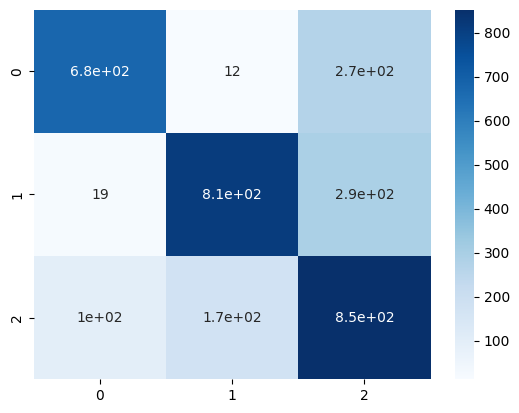

In [57]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

In [58]:
cf_matrix

array([[676,  12, 269],
       [ 19, 810, 292],
       [100, 174, 852]])

**7.**

In [59]:
from sklearn.tree import DecisionTreeClassifier
tree_cla = DecisionTreeClassifier(max_depth = 5)
tree_cla= tree_cla.fit(X_train,y_train)
y_pred_tree=tree_cla.predict(X_test)

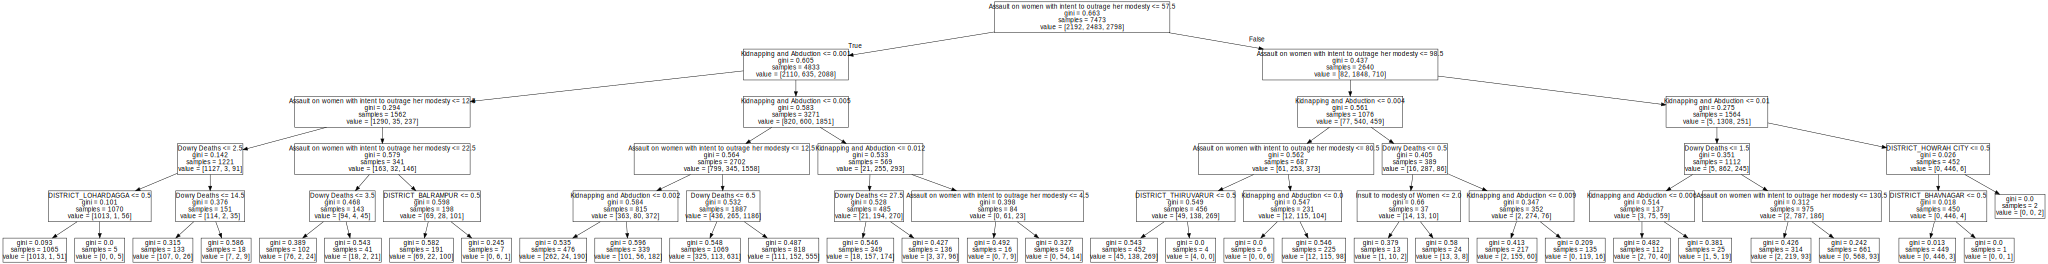

In [60]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(tree_cla, out_file=None, feature_names=X.columns))

Если поинт больше чем 0.525 то идет вправо, если между 0.525 и 0.575 то вниз

**Доп баллы**

In [61]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca=pca.fit_transform(X)

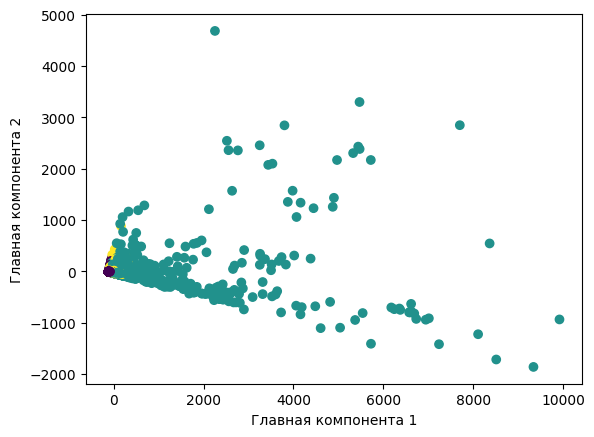

In [62]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis')
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.show()